# Présentation du TP 3-4

Dans ce TP, l'objectif est d'implémenter les opérations de calcul de composantes fortement connexes ainsi que de fermeture transitive, sur les graphes orientés. 

La représentation choisie pour les graphes est une matrice d'adjacence, qui sera représentée par un tableau de tableau (les noms des sommets sont des entiers et seront numérotés en commençant à 0). Nous considérons que le nombre de sommets du graphe ne pourra pas être modifié une fois le graphe construit.


## Installation de graphviz pour pouvoir visualiser les graphes

In [210]:
!pip install graphviz
import graphviz
graphviz.__version__, graphviz.version()

('0.19.1', (2, 43, 0))

## Création d'une fonction de conversion d'un graphe, défini par une matrice d'adjacence, vers le format graphviz

In [211]:
def creation_graphe_graphviz(g):
    # création d'un graphe orienté
    dot = graphviz.Digraph()
    
    # ajout des sommets
    for i in range(len(g)):
        dot.node(str(i))
    
    # ajout des arcs
    for i in range(len(g)):
        for j in range(len(g)):
            if g[i][j] == 1:
                dot.edge(str(i), str(j))
    
    return dot


## Création et affichage d'un premier graphe orienté


In [212]:
graphe1 = [[0,1,1],
          [1,0,1],
          [1,0,0]]

#### Affichage de la matrice

In [213]:
print(graphe1)

[[0, 1, 1], [1, 0, 1], [1, 0, 0]]


#### Création du graphe associé, au format graphviz, pour pouvoir faire l'affichage de la représentation sagittale du graphe

In [214]:
gdot1 = creation_graphe_graphviz(graphe1)
#print(gdot1.source)

#### Affichage de la représentation sagittale du graphe

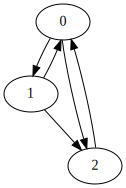

In [215]:
gdot1

## Création et affichage d'un deuxième graphe orienté

In [216]:
graphe2 = [[0,0,1,1,0,0,0],
          [1,0,0,0,0,0,1],
          [0,0,0,0,1,0,0],
          [0,1,1,0,0,0,0],
          [0,0,0,0,0,0,0],
          [0,0,0,0,1,0,0],
          [0,0,0,0,0,0,1]]

#### Création et affichage du graphe associé, au format graphviz

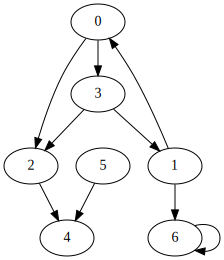

In [217]:
gdot2 = creation_graphe_graphviz(graphe2)
#print(gdot2.source)
gdot2



# Définition des premières fonctions pour manipuler les graphes (fonctions données)


#### Fonction qui construit un graphe vide (sans arcs), avec le nombre de sommets donné, et qui retourne la matrice d'adjacence correspondante

In [218]:
def graphe_vide(n):
    g = []
    for i in range(n):
        l = []
        for j in range(n):
            l.append(0)
        g.append(l)
    return g

#### Fonction qui retourne vrai si l'arc, dont les numéros de sommets extrémités sont donnés, existe

In [219]:
def est_arc(g, i, j):
    return g[i][j] == 1


#### Fonction qui ajoute un arc au graphe, s'il n'est pas déjà présent

In [220]:
def ajoute_arc(g, i, j):
    g[i][j] = 1

#### Fonction qui ote un arc du graphe, s'il était déjà présent

In [221]:
def ote_arc(g, i, j):
    g[i][j] = 0

#### Fonction qui retourne le nombre de sommets du graphe

In [222]:
def nb_sommets(g):
    return len(g)

#### Fonction qui retourne un tableau contenant les noms des sommets successeurs du sommet donné

In [223]:
def successeurs(g,s):
    succs = []
    for i in range(len(g)):
        if g[s][i]==1:
            succs.append(i)
    return succs

#### Fonction qui retourne un tableau contenant les noms des sommets prédécesseurs du sommet donné

In [224]:
def predecesseurs(g,s):
    preds = []
    for i in range(len(g)):
        if g[i][s]==1:
            preds.append(i)
    return preds

# Définition des fonctions à écrire


#### Fonction qui donne la liste des sommets descendants du sommet d'indice donné

In [225]:
def liste_descendants(g, s):
    descs = []
    file = []
    
    file.append(s)
    while len(file) > 0:
        scour = file[0]
        file = file[1:]
        succs = successeurs(g, scour)
        for i in range(len(succs)):
            if(succs[i] not in descs):
                file.append(succs[i])
                descs.append(succs[i])
    
    return descs

In [226]:
# test de la fonction liste_descendants
print("descendants du graphe 1")
print("\tsommet 0 : ", liste_descendants(graphe1, 0))
print("\tsommet 1 : ", liste_descendants(graphe1, 1))
print("\tsommet 2 : ", liste_descendants(graphe1, 2))

print("\ndescendants du graphe 2")
print("\tsommet 0 : ", liste_descendants(graphe2, 0))
print("\tsommet 1 : ", liste_descendants(graphe2, 1))
print("\tsommet 2 : ", liste_descendants(graphe2, 2))
print("\tsommet 3 : ", liste_descendants(graphe2, 3))
print("\tsommet 4 : ", liste_descendants(graphe2, 4))
print("\tsommet 5 : ", liste_descendants(graphe2, 5))
print("\tsommet 6 : ", liste_descendants(graphe2, 6))

descendants du graphe 1
	sommet 0 :  [1, 2, 0]
	sommet 1 :  [0, 2, 1]
	sommet 2 :  [0, 1, 2]

descendants du graphe 2
	sommet 0 :  [2, 3, 4, 1, 0, 6]
	sommet 1 :  [0, 6, 2, 3, 4, 1]
	sommet 2 :  [4]
	sommet 3 :  [1, 2, 0, 6, 4, 3]
	sommet 4 :  []
	sommet 5 :  [4]
	sommet 6 :  [6]


#### Fonction qui donne la liste des sommets ascendants du sommet d'indice donné

In [227]:
def liste_ascendants(g, s):
    ascs = []
    file = []
    
    file.append(s)
    while len(file) > 0:
        scour = file[0]
        file = file[1:]
        preds = predecesseurs(g, scour)
        for i in range(len(preds)):
            if(preds[i] not in ascs):
                file.append(preds[i])
                ascs.append(preds[i])
    
    return ascs

In [228]:
# test de la fonction liste_ascendants
print("ascendants du graphe 1")
print("\tsommet 0 : ", liste_ascendants(graphe1, 0))
print("\tsommet 1 : ", liste_ascendants(graphe1, 1))
print("\tsommet 2 : ", liste_ascendants(graphe1, 2))

print("\nascendants du graphe 2")
print("\tsommet 0 : ", liste_ascendants(graphe2, 0))
print("\tsommet 1 : ", liste_ascendants(graphe2, 1))
print("\tsommet 2 : ", liste_ascendants(graphe2, 2))
print("\tsommet 3 : ", liste_ascendants(graphe2, 3))
print("\tsommet 4 : ", liste_ascendants(graphe2, 4))
print("\tsommet 5 : ", liste_ascendants(graphe2, 5))
print("\tsommet 6 : ", liste_ascendants(graphe2, 6))

ascendants du graphe 1
	sommet 0 :  [1, 2, 0]
	sommet 1 :  [0, 1, 2]
	sommet 2 :  [0, 1, 2]

ascendants du graphe 2
	sommet 0 :  [1, 3, 0]
	sommet 1 :  [3, 0, 1]
	sommet 2 :  [0, 3, 1]
	sommet 3 :  [0, 1, 3]
	sommet 4 :  [2, 5, 0, 3, 1]
	sommet 5 :  []
	sommet 6 :  [1, 6, 3, 0]


#### Fonction qui donne la composante fortement connexe du sommet s, sous la forme d'une liste de sommets

In [229]:
def cfc_sommet(g, s):
    cfc = []
    ld=liste_descendants(g, s)
    la=liste_ascendants(g, s)
    for i in range(len(la)):
        for y in range(len(ld)):
            if la[i]==ld[y]:
                cfc.append(la[i])
    if cfc==[]:
        cfc.append(s)
    return set(cfc)

composantes fortement connexes des sommets du graphe 1
	sommet 0 :  {0, 1, 2}
	sommet 1 :  {0, 1, 2}
	sommet 2 :  {0, 1, 2}

composantes fortement connexes des sommets du graphe 2
	sommet 0 :  {0, 1, 3}
	sommet 1 :  {0, 1, 3}
	sommet 2 :  {2}
	sommet 3 :  {0, 1, 3}
	sommet 4 :  {4}
	sommet 5 :  {5}
	sommet 6 :  {6}


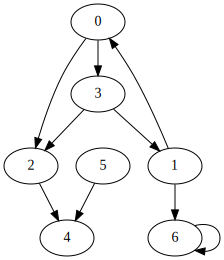

In [230]:
# test de la fonction cfc_sommet
print("composantes fortement connexes des sommets du graphe 1")
print("\tsommet 0 : ", cfc_sommet(graphe1, 0))
print("\tsommet 1 : ", cfc_sommet(graphe1, 1))
print("\tsommet 2 : ", cfc_sommet(graphe1, 2))

print("\ncomposantes fortement connexes des sommets du graphe 2")
print("\tsommet 0 : ", cfc_sommet(graphe2, 0))
print("\tsommet 1 : ", cfc_sommet(graphe2, 1))
print("\tsommet 2 : ", cfc_sommet(graphe2, 2))
print("\tsommet 3 : ", cfc_sommet(graphe2, 3))
print("\tsommet 4 : ", cfc_sommet(graphe2, 4))
print("\tsommet 5 : ", cfc_sommet(graphe2, 5))
print("\tsommet 6 : ", cfc_sommet(graphe2, 6))
gdot2 = creation_graphe_graphviz(graphe2)
gdot2


#### Fonction qui donne la liste des composantes fortement connexes du graphe, sous la forme d'une liste de listes de sommets

In [231]:
def cfc_graphe(g):
    lcfc = []
    for i in range(len(g)):
        if cfc_sommet(g,i) and cfc_sommet(g,i) not in lcfc:
            lcfc.append(cfc_sommet(g,i))
    return lcfc

In [232]:
# test de la fonction cfc_graphe
print("composantes fortement connexes des sommets du graphe 1")
print(cfc_graphe(graphe1))

print("\ncomposantes fortement connexes des sommets du graphe 2")
print(cfc_graphe(graphe2))

composantes fortement connexes des sommets du graphe 1
[{0, 1, 2}]

composantes fortement connexes des sommets du graphe 2
[{0, 1, 3}, {2}, {4}, {5}, {6}]


#### Fonction qui retourne vrai si le graphe est fortement connexe

In [233]:
def est_fortement_connexe(g):
    if len(cfc_graphe(g))==1:
        return True
    return False

In [234]:
# test de la fonction est_fortement_connexe
print("graphe 1 fortement connexe ?", est_fortement_connexe(graphe1))

print("\ngraphe 2 fortement connexe ?", est_fortement_connexe(graphe2))

graphe 1 fortement connexe ? True

graphe 2 fortement connexe ? False


#### Fonction qui construit le graphe correspondant à la fermeture transitive du graphe en paramètre

In [249]:
def graphe_fermeture_transitive(g):
    gf = [[j for j in i] for i in g]
    for i in range(len(g)):
        la=liste_descendants(g,i)
        print(i,la)
        for y in la:
            if i!=y:
                ajoute_arc(gf,i,y)
    return gf

fermeture transitive du graphe 1
0 [1, 2, 0]
1 [0, 2, 1]
2 [0, 1, 2]


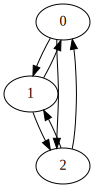

In [250]:
# test de la fonction graphe_fermeture_transitive du 1er graphe
print("fermeture transitive du graphe 1")
graphe1_ft = graphe_fermeture_transitive(graphe1)
#print(graphe1_ft)
graphe1_ft = creation_graphe_graphviz(graphe1_ft)
graphe1_ft

fermeture transitive du graphe 2
0 [2, 3, 4, 1, 0, 6]
1 [0, 6, 2, 3, 4, 1]
2 [4]
3 [1, 2, 0, 6, 4, 3]
4 []
5 [4]
6 [6]


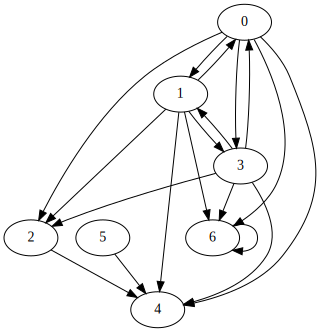

In [251]:
# test de la fonction graphe_fermeture_transitive du 2e graphe
print("fermeture transitive du graphe 2")
graphe2_ft = graphe_fermeture_transitive(graphe2)
#print(graphe2_ft)
graphe2_ft = creation_graphe_graphviz(graphe2_ft)
graphe2_ft

#### Fonction qui donne la composante connexe du sommet s, sous la forme d'une liste de sommets

In [254]:
def cc_sommet(g, s):
    cc = []
    ld=liste_descendants(g, s)
    la=liste_ascendants(g, s)
    for i in la:
        if i not in cc:
            cc.append(i)
    for i in ld:
        if i not in cc:
            cc.append(i)
    return set(cc)

In [255]:
# test de la fonction cc_sommet
print("composantes connexes des sommets du graphe 1")
print("\tsommet 0 : ", cc_sommet(graphe1, 0))
print("\tsommet 1 : ", cc_sommet(graphe1, 1))
print("\tsommet 2 : ", cc_sommet(graphe1, 2))

print("\ncomposantes connexes des sommets du graphe 2")
print("\tsommet 0 : ", cc_sommet(graphe2, 0))
print("\tsommet 1 : ", cc_sommet(graphe2, 1))
print("\tsommet 2 : ", cc_sommet(graphe2, 2))
print("\tsommet 3 : ", cc_sommet(graphe2, 3))
print("\tsommet 4 : ", cc_sommet(graphe2, 4))
print("\tsommet 5 : ", cc_sommet(graphe2, 5))
print("\tsommet 6 : ", cc_sommet(graphe2, 6))

composantes connexes des sommets du graphe 1
	sommet 0 :  {0, 1, 2}
	sommet 1 :  {0, 1, 2}
	sommet 2 :  {0, 1, 2}

composantes connexes des sommets du graphe 2
	sommet 0 :  {0, 1, 2, 3, 4, 6}
	sommet 1 :  {0, 1, 2, 3, 4, 6}
	sommet 2 :  {0, 1, 3, 4}
	sommet 3 :  {0, 1, 2, 3, 4, 6}
	sommet 4 :  {0, 1, 2, 3, 5}
	sommet 5 :  {4}
	sommet 6 :  {0, 1, 3, 6}


#### Fonction qui donne la liste des composantes connexes du graphe, sous la forme d'une liste de listes de sommets

In [240]:
def cc_graphe(g):
    lcc = []
    #todo
    return lcc

In [241]:
# test de la fonction cc_graphe
print("composantes connexes des sommets du graphe 1")
print(cc_graphe(graphe1))

print("\ncomposantes connexes des sommets du graphe 2")
print(cc_graphe(graphe2))

composantes connexes des sommets du graphe 1
[]

composantes connexes des sommets du graphe 2
[]


#### Fonction qui retourne vrai si le graphe est connexe

In [242]:
def est_connexe(g):
    #todo
    return False

In [243]:
# test de la fonction est_connexe
print("graphe 1 connexe ?", est_connexe(graphe1))

print("\ngraphe 2 connexe ?", est_connexe(graphe2))

graphe 1 connexe ? False

graphe 2 connexe ? False
